In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
import plotly.express as px

In [338]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [300]:
train_data.shape

(1460, 81)

In [301]:
test_data.shape

(1459, 80)

In [302]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [303]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [304]:
test_data["SaleType"].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [305]:
def understand_data(train_data) :
    return(pd.DataFrame({"Datatype":train_data.dtypes,"No of NAs":train_data.isna().sum(),"No of Levels":train_data.apply(lambda x: x.nunique(),axis=0),"Levels":train_data.apply(lambda x: str(x.unique()),axis=0)}))

In [306]:
# Understanding train data
understand_data(train_data)

,Datatype,No of NAs,No of Levels,Levels
Id,int64,0,1460,[ 1 2 3 ... 1458 1459 1460]
MSSubClass,int64,0,15,[ 60 20 70 50 190 45 90 120 30 85 80 1...
MSZoning,object,0,5,['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage,float64,259,110,[ 65. 80. 68. 60. 84. 85. 75. nan 51. ...
LotArea,int64,0,1073,[ 8450 9600 11250 ... 17217 13175 9717]
...,...,...,...,...
MoSold,int64,0,12,[ 2 5 9 12 10 8 11 4 1 7 3 6]
YrSold,int64,0,5,[2008 2007 2006 2009 2010]
SaleType,object,0,9,['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw...
SaleCondition,object,0,6,['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloc...


In [307]:
# Understanding test data
understand_data(test_data)

,Datatype,No of NAs,No of Levels,Levels
Id,int64,0,1459,[1461 1462 1463 ... 2917 2918 2919]
MSSubClass,int64,0,16,[ 20 60 120 160 80 30 50 90 85 190 45 ...
MSZoning,object,4,5,['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
LotFrontage,float64,227,115,[ 80. 81. 74. 78. 43. 75. nan 63. 85. ...
LotArea,int64,0,1106,[11622 14267 13830 ... 1894 20000 10441]
...,...,...,...,...
MiscVal,int64,0,26,[ 0 12500 500 1500 300 450 80 6...
MoSold,int64,0,12,[ 6 3 1 4 5 2 7 10 8 11 9 12]
YrSold,int64,0,5,[2010 2009 2008 2007 2006]
SaleType,object,1,9,['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' ...


In [339]:
train_data = train_data.drop('Id', axis=1)

In [340]:
# adding id variable into different label
label=test_data["Id"]

In [217]:
nan_count=100*train_data.isna().sum().sort_values(ascending=False)/train_data.shape[0]
fig=px.bar(x=nan_count.index,y=nan_count.values, labels={"y": "Nan ammount (%)","x": "Feature"})
fig.show()

In [218]:
nan_count=100*train_data.isna().sum().sort_values(ascending=False)/train_data.shape[0]
nan_count

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
Heating         0.000000
HeatingQC       0.000000
MSZoning        0.000000
1stFlrSF        0.000000
SalePrice       0.000000
Length: 80, dtype: float64

In [341]:
# dropping columns with na > 40%
train_data=train_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence',"FireplaceQu"])
test_data=test_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence',"FireplaceQu"])

In [342]:
train_data['BsmtFinSF'] = train_data.BsmtFinSF1 + train_data.BsmtFinSF2
train_data['Porch'] = train_data.ScreenPorch + train_data.EnclosedPorch + train_data.OpenPorchSF + train_data.WoodDeckSF
train_data['Total_surface'] = train_data.TotalBsmtSF + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['Age'] = train_data.YrSold - train_data.YearBuilt
train_data['RemodAge'] = train_data.YrSold - train_data.YearRemodAdd
train_data['GarageAge'] = train_data.YrSold - train_data.GarageYrBlt

In [343]:
test_data['BsmtFinSF'] = test_data.BsmtFinSF1 + test_data.BsmtFinSF2
test_data['Porch'] = test_data.ScreenPorch + test_data.EnclosedPorch + test_data.OpenPorchSF + test_data.WoodDeckSF
test_data['Total_surface'] = test_data.TotalBsmtSF + test_data['1stFlrSF'] + test_data['2ndFlrSF']
test_data['Age'] = test_data.YrSold - test_data.YearBuilt
test_data['RemodAge'] = test_data.YrSold - test_data.YearRemodAdd
test_data['GarageAge'] = test_data.YrSold - test_data.GarageYrBlt

In [344]:
drop_cols = ['BsmtFinSF1','BsmtFinSF2','LowQualFinSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
             'MiscVal','YrSold','1stFlrSF','2ndFlrSF' ,'BsmtUnfSF','TotalBsmtSF', 'YearBuilt','YearRemodAdd']

In [345]:
train_data.drop(drop_cols, inplace = True, axis=1)

In [346]:
test_data.drop(drop_cols, inplace = True, axis=1)

In [347]:
test_data.shape

(1459, 64)

In [348]:
train_data.shape

(1460, 64)

In [318]:
# store columns with specific data type
integer_columns = train_data.select_dtypes(include=['int64']).columns
float_columns = train_data.select_dtypes(include=['float64']).columns
object_columns = train_data.select_dtypes(include=['object']).columns

In [319]:
# display columns
print('\nint64 columns:\n', integer_columns)
print('\nfloat64 columns:\n', float_columns)
print('\nobject columns:\n', object_columns)


int64 columns:
 Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'SalePrice', 'BsmtFinSF', 'Porch',
       'Total_surface', 'Age', 'RemodAge'],
      dtype='object')

float64 columns:
 Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'GarageAge'], dtype='object')

object columns:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',

In [320]:
# list of numerical variables
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train_data[numerical_features].head()

Number of numerical variables:  26


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,GarageCars,GarageArea,MoSold,SalePrice,BsmtFinSF,Porch,Total_surface,Age,RemodAge,GarageAge
0,60,65.0,8450,7,5,196.0,1710,1,0,2,...,2,548,2,208500,706,61,2566,5,5,5.0
1,20,80.0,9600,6,8,0.0,1262,0,1,2,...,2,460,5,181500,978,298,2524,31,31,31.0
2,60,68.0,11250,7,5,162.0,1786,1,0,2,...,2,608,9,223500,486,42,2706,7,6,7.0
3,70,60.0,9550,7,5,0.0,1717,1,0,1,...,3,642,2,140000,216,307,2473,91,36,8.0
4,60,84.0,14260,8,5,350.0,2198,1,0,2,...,3,836,12,250000,655,276,3343,8,8,8.0


In [321]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


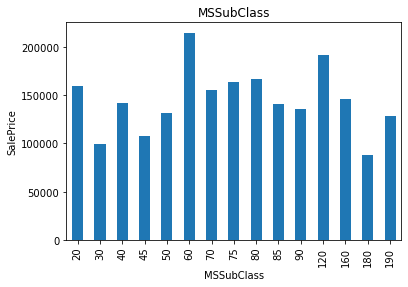

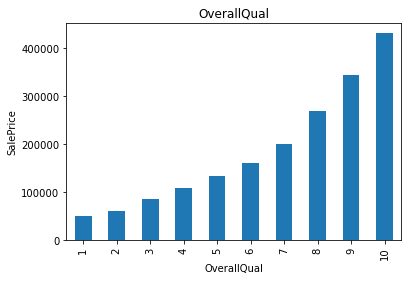

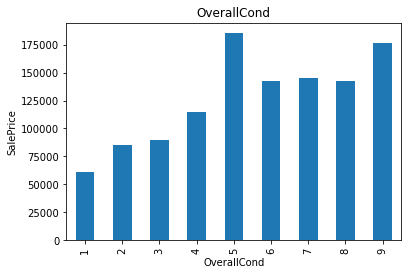

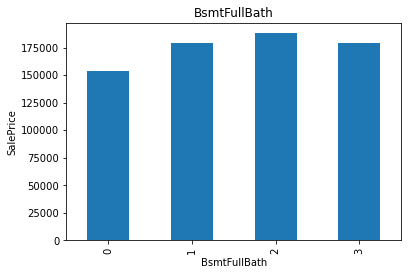

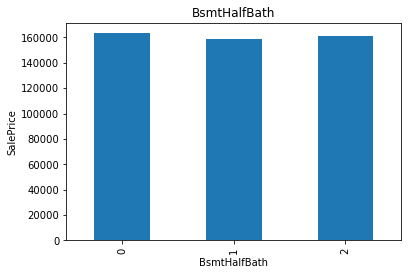

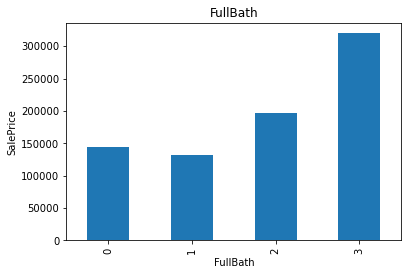

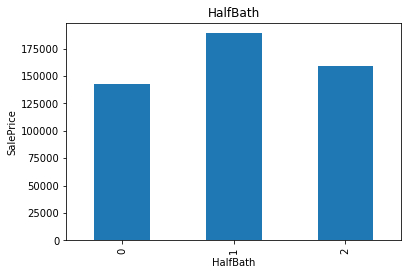

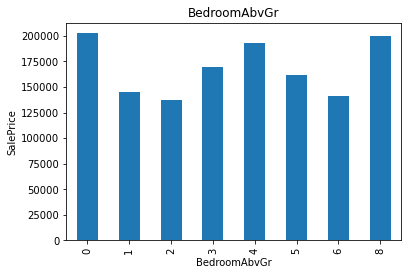

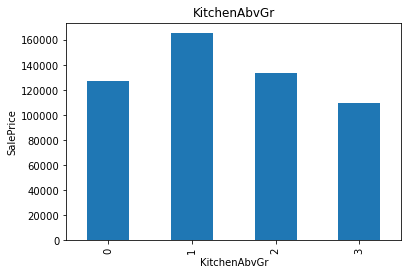

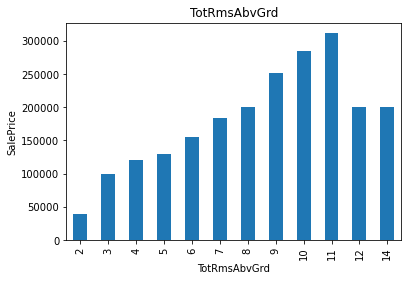

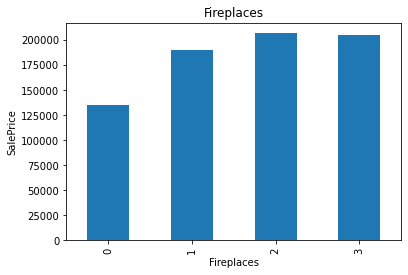

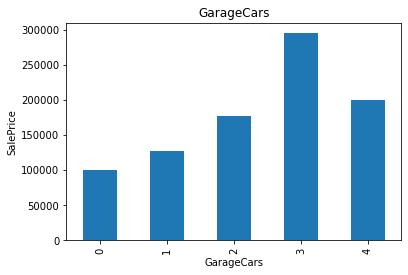

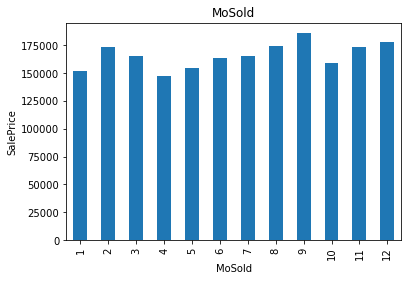

In [143]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [144]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 13


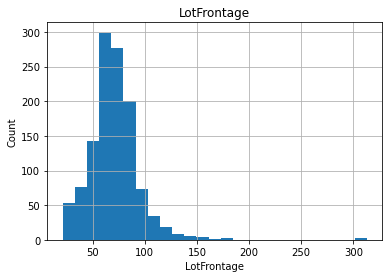

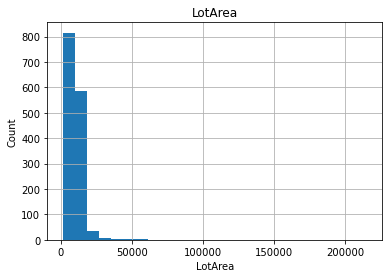

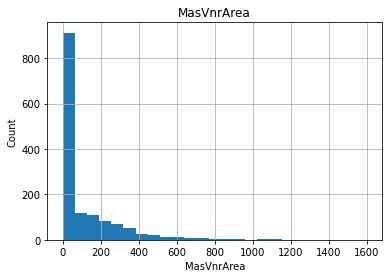

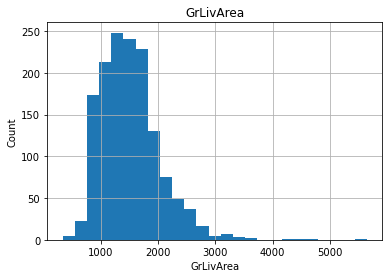

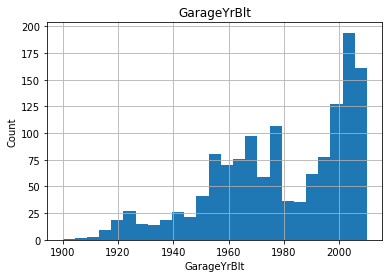

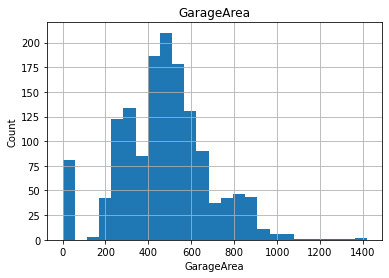

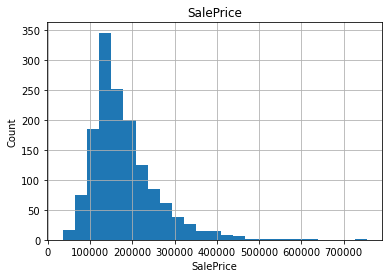

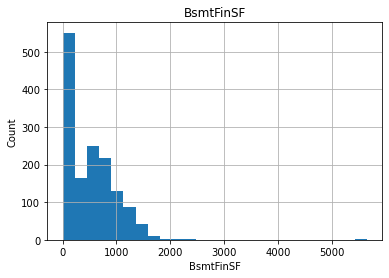

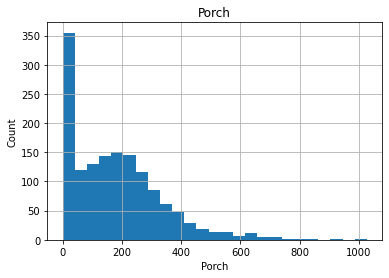

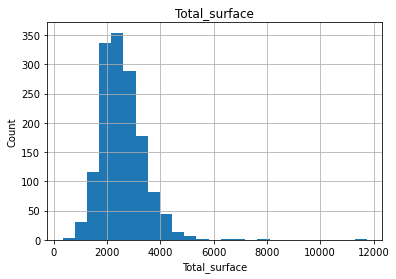

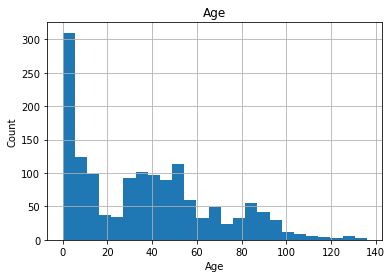

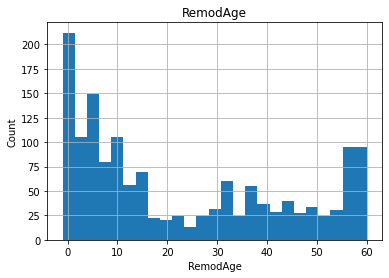

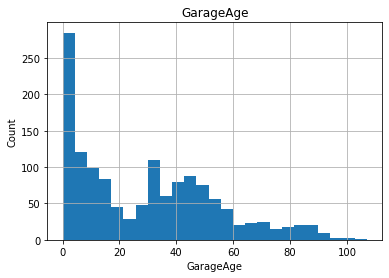

In [145]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

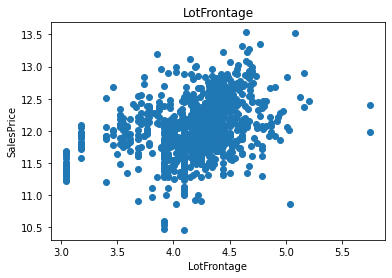

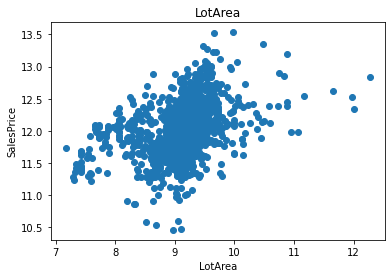

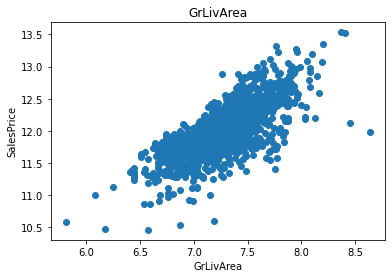

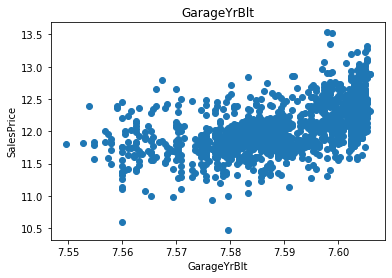

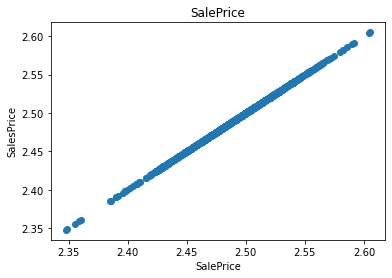

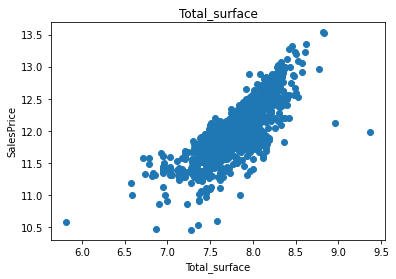

In [146]:
## we can see that the continuous features have some skewness so we add log transformation to make them noramlly disrtubuted
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

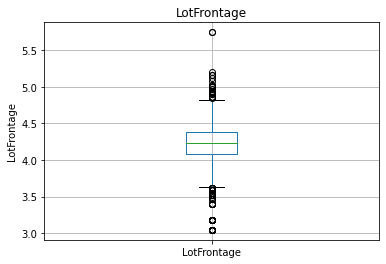

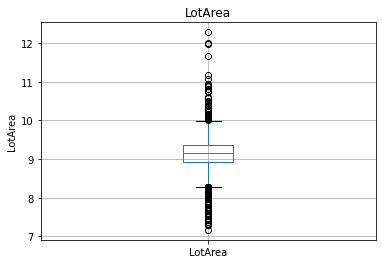

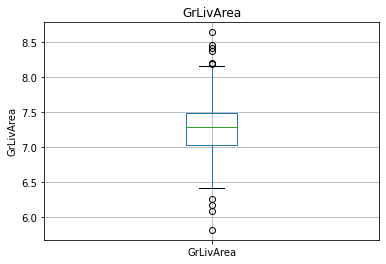

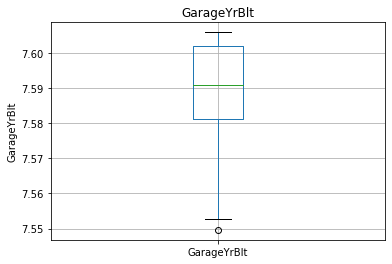

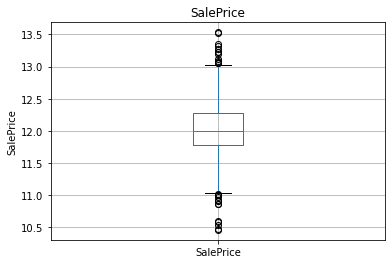

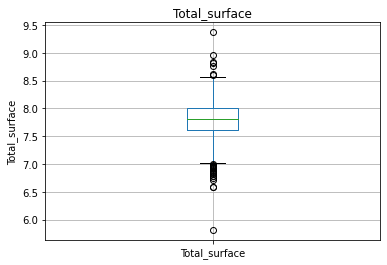

In [147]:
for feature in continuous_feature:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [148]:
categorical_features=[feature for feature in train_data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

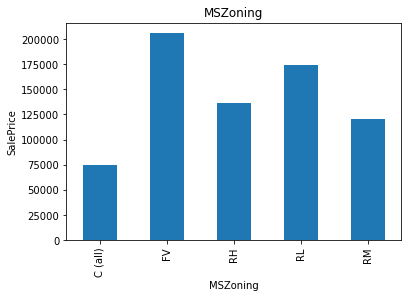

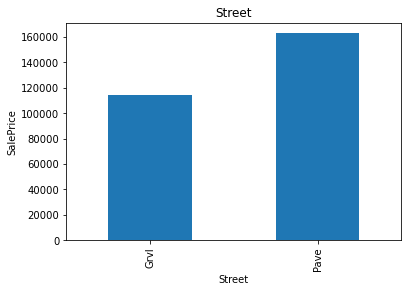

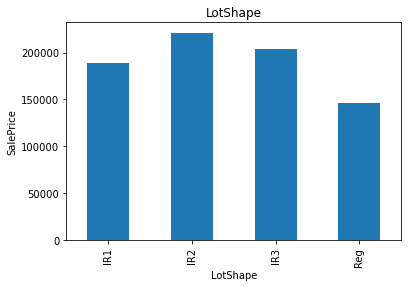

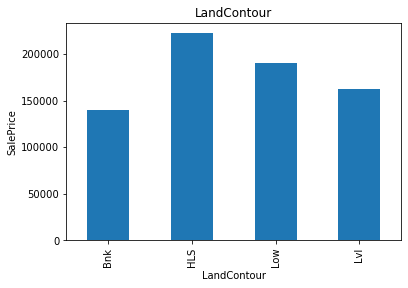

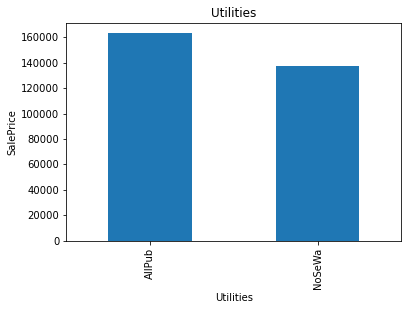

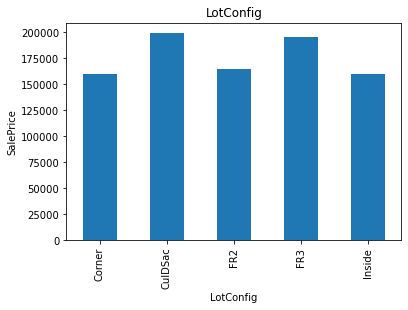

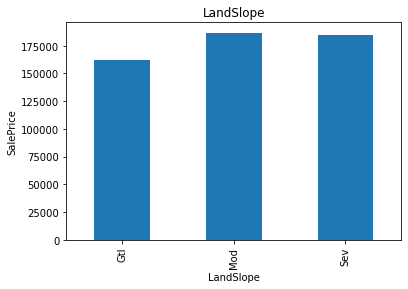

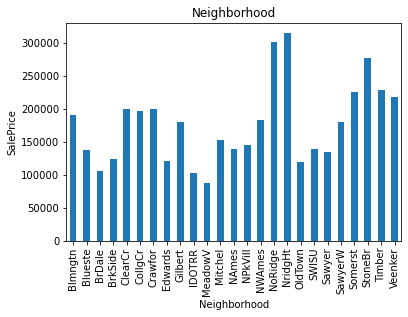

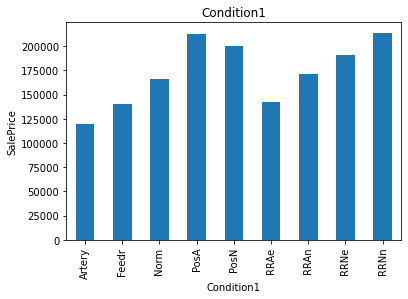

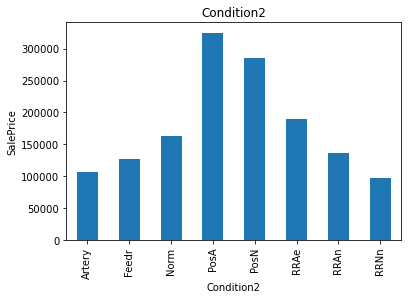

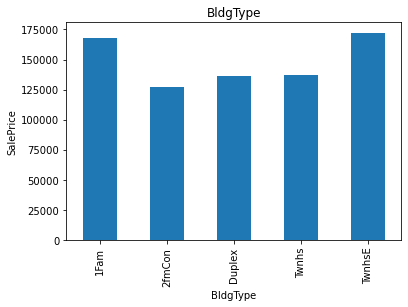

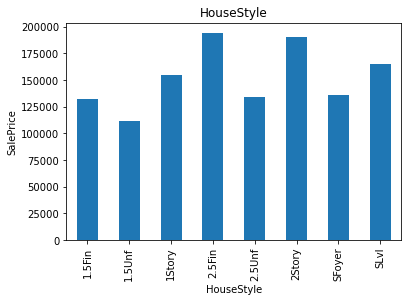

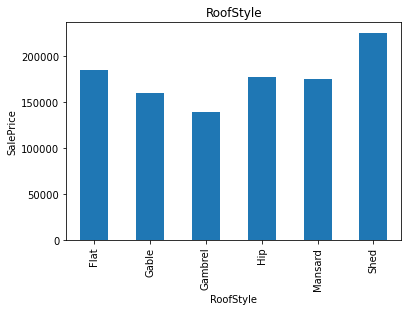

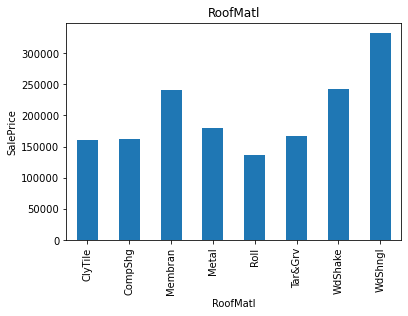

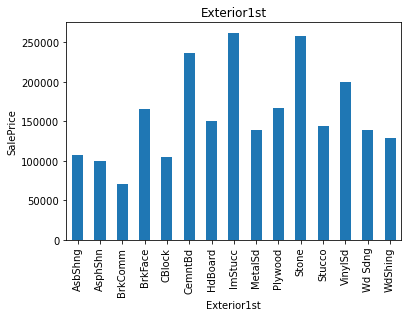

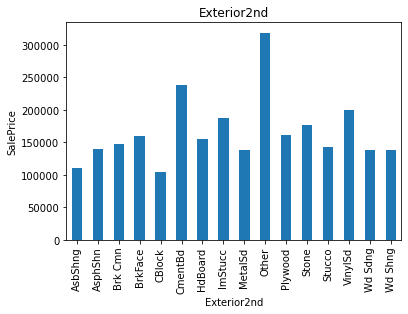

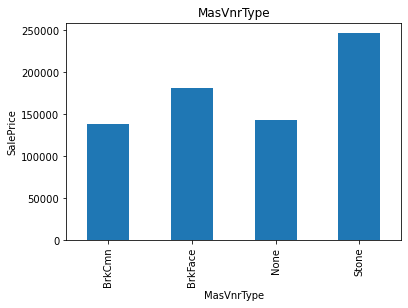

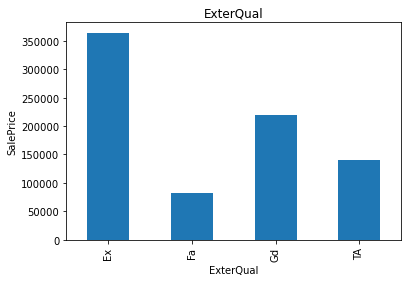

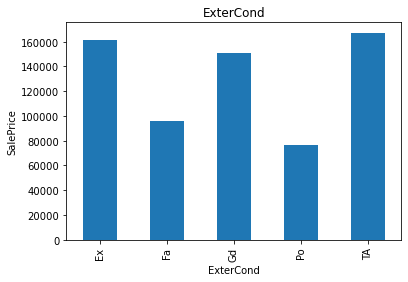

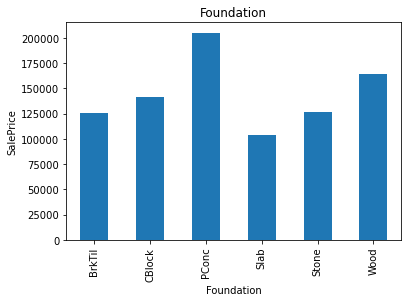

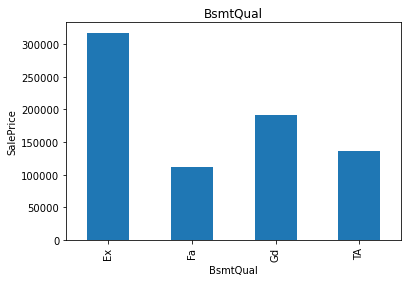

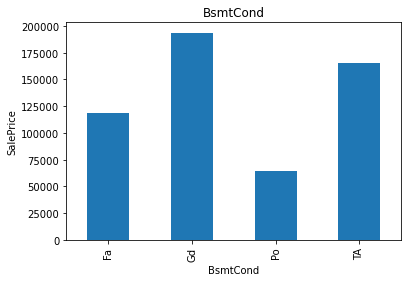

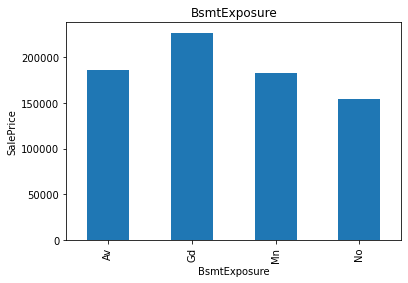

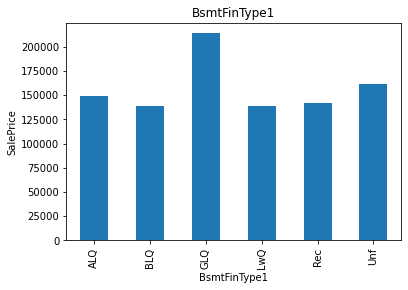

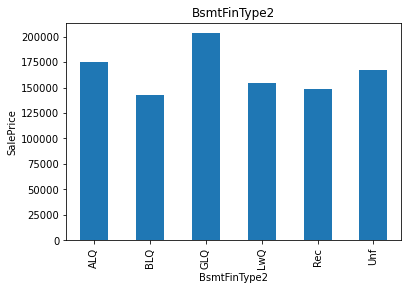

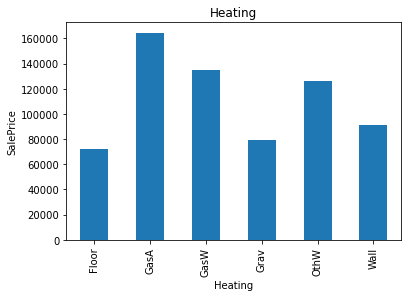

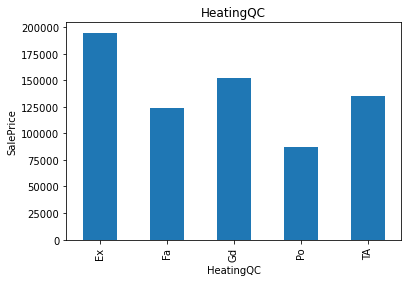

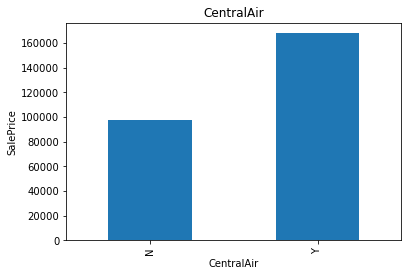

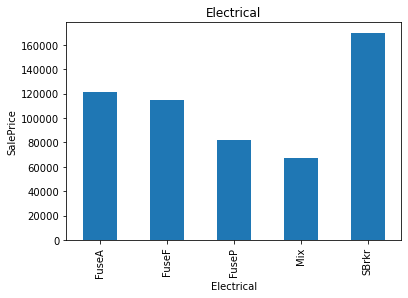

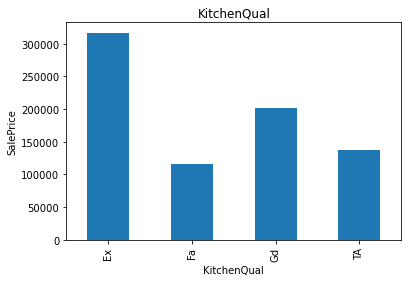

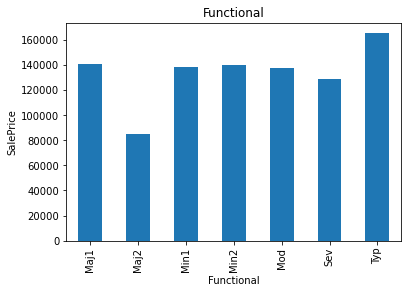

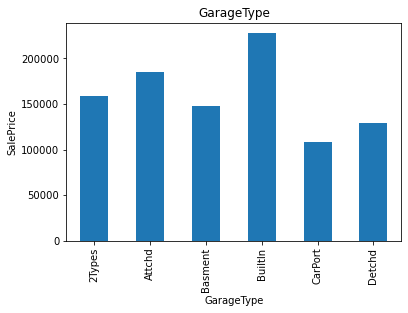

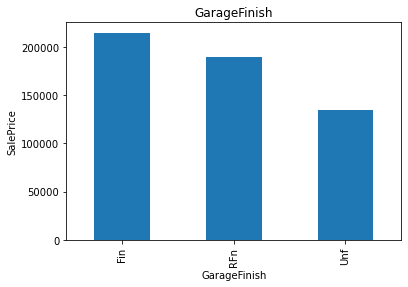

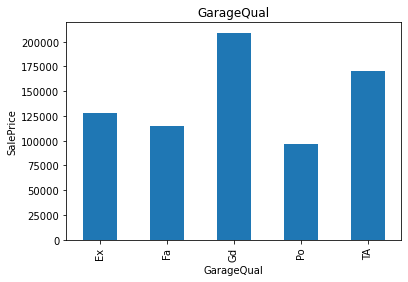

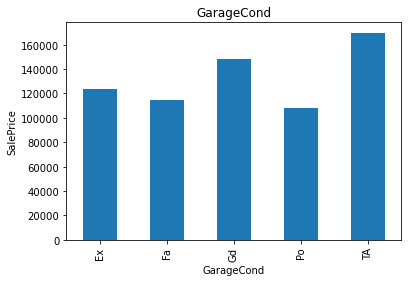

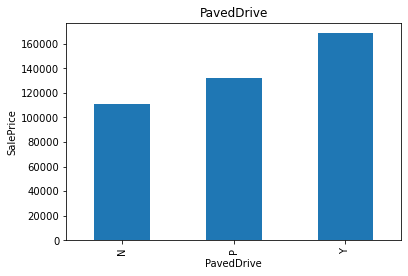

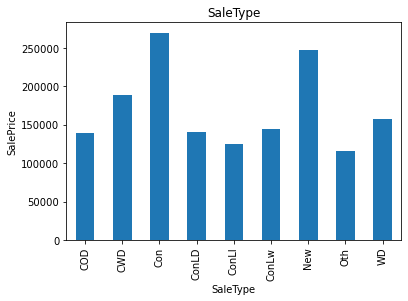

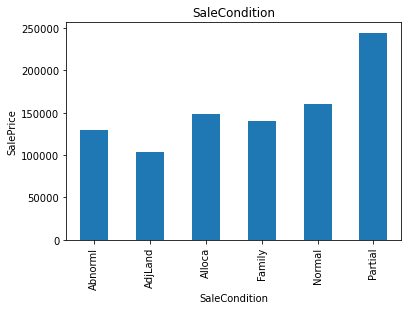

In [149]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [349]:
# converting into categorical data types
train_data[object_columns] =train_data[object_columns].astype("category")

In [350]:
# converting into categorical data types
test_data[object_columns] =test_data[object_columns].astype("category")

In [351]:
catregorical_col=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [352]:
numeric_list=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'MoSold', 'BsmtFinSF', 'Porch',
       'Total_surface', 'Age', 'RemodAge','LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'GarageAge']

<AxesSubplot:>

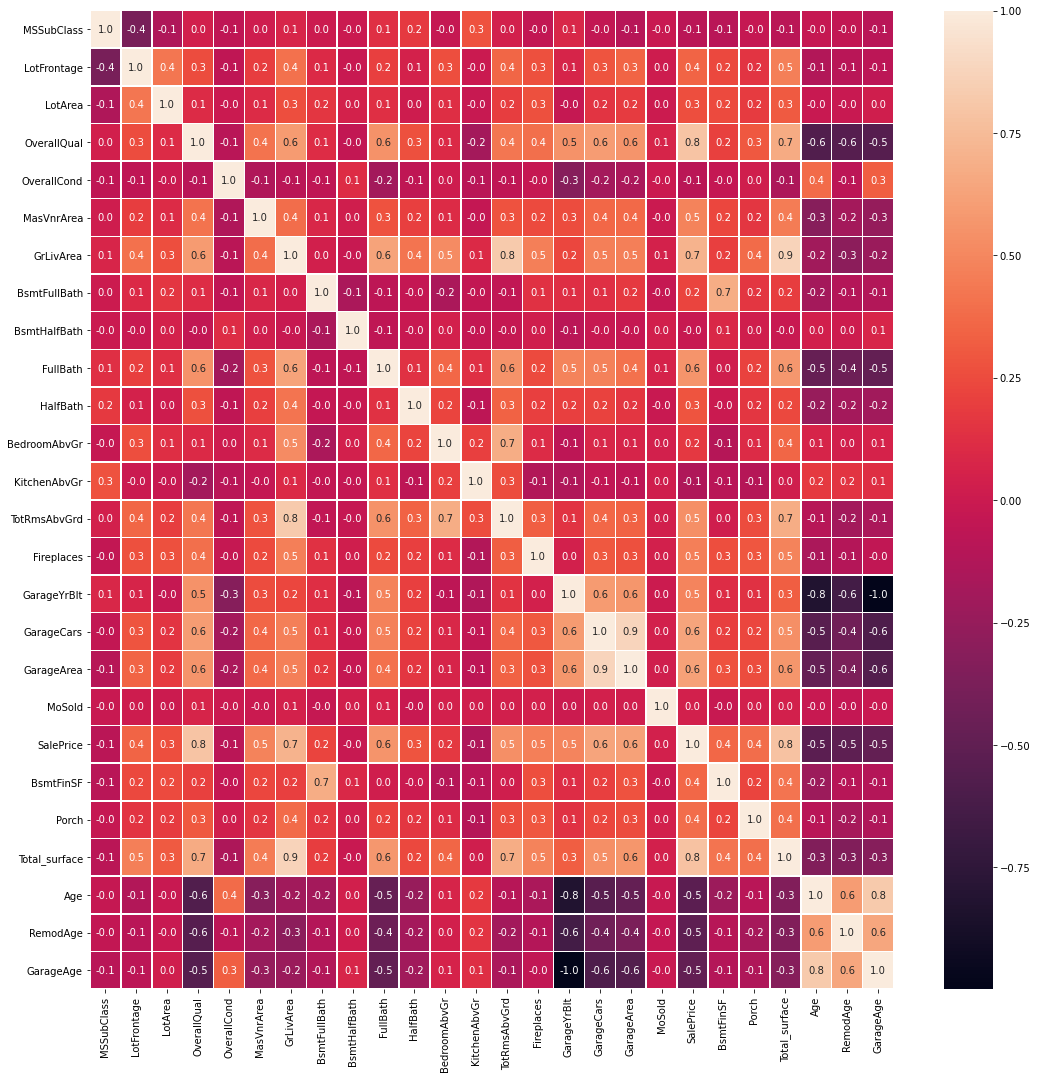

In [279]:
# generally correlation values > 0.5 or 0.6 are dropped
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [280]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,GarageCars,GarageArea,MoSold,SalePrice,BsmtFinSF,Porch,Total_surface,Age,RemodAge,GarageAge
MSSubClass,1.000000,0.386347,0.139781,0.032628,0.059316,0.022936,0.074853,0.003491,0.002333,0.131608,...,0.040110,0.098672,0.013585,0.084284,0.089145,0.026802,0.082225,0.028746,0.041968,0.086185
LotFrontage,0.386347,1.000000,0.426095,0.251646,0.059213,0.193458,0.402797,0.100949,0.007234,0.198769,...,0.285691,0.344997,0.011200,0.351799,0.239804,0.155169,0.461464,0.122848,0.088417,0.069559
LotArea,0.139781,0.426095,1.000000,0.105806,0.005636,0.104160,0.263116,0.158155,0.048046,0.126031,...,0.154871,0.180403,0.001205,0.263843,0.242775,0.182778,0.307234,0.014832,0.014709,0.024168
OverallQual,0.032628,0.251646,0.105806,1.000000,0.091932,0.411876,0.593007,0.111098,0.040150,0.550600,...,0.600671,0.562022,0.070815,0.790982,0.209564,0.302639,0.668155,0.572629,0.552570,0.547980
OverallCond,0.059316,0.059213,0.005636,0.091932,1.000000,0.128101,0.079686,0.054942,0.117821,0.194149,...,0.185758,0.151521,0.003511,0.077856,0.030657,0.030733,0.143814,0.377325,0.070931,0.326516


In [281]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

<ipython-input-281-b8b02147a528>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,GarageCars,GarageArea,MoSold,SalePrice,BsmtFinSF,Porch,Total_surface,Age,RemodAge,GarageAge
MSSubClass,NaN,0.386347,0.139781,0.032628,0.059316,0.022936,0.074853,0.003491,0.002333,0.131608,...,0.040110,0.098672,0.013585,0.084284,0.089145,0.026802,0.082225,0.028746,0.041968,0.086185
LotFrontage,NaN,NaN,0.426095,0.251646,0.059213,0.193458,0.402797,0.100949,0.007234,0.198769,...,0.285691,0.344997,0.011200,0.351799,0.239804,0.155169,0.461464,0.122848,0.088417,0.069559
LotArea,NaN,NaN,NaN,0.105806,0.005636,0.104160,0.263116,0.158155,0.048046,0.126031,...,0.154871,0.180403,0.001205,0.263843,0.242775,0.182778,0.307234,0.014832,0.014709,0.024168
OverallQual,NaN,NaN,NaN,NaN,0.091932,0.411876,0.593007,0.111098,0.040150,0.550600,...,0.600671,0.562022,0.070815,0.790982,0.209564,0.302639,0.668155,0.572629,0.552570,0.547980
OverallCond,NaN,NaN,NaN,NaN,NaN,0.128101,0.079686,0.054942,0.117821,0.194149,...,0.185758,0.151521,0.003511,0.077856,0.030657,0.030733,0.143814,0.377325,0.070931,0.326516


In [353]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(train_data[numeric_list])
train_data[numeric_list] = imputer.transform(train_data[numeric_list])

In [381]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(test_data[numeric_list])
test_data[numeric_list] = imputer.transform(test_data[numeric_list])

In [355]:
# Performing train test split on the data
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [335]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [356]:
# scaling of the numerical columns and dummification for the categorical variables
mapper = DataFrameMapper(
    [([continuous_col],MinMaxScaler()) for continuous_col in numeric_list]+
    [([catregorical_col],[SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore')])for catregorical_col in catregorical_col]
    ,df_out=True)

In [357]:
mapper.fit(X_train,X_test)

X_train_std = mapper.transform(X_train)
X_test_std = mapper.transform(X_test)

In [358]:
# structure os x_train
X_train_std.shape

(1022, 254)

In [359]:
# structure os x_test
X_test_std.shape

(438, 254)

In [360]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def model_building(model):
    m=model
    m.fit(X_train_std,y_train)
    train_pred = m.predict(X_train_std)
    val_pred = m.predict(X_test_std)
    #residuals=val_pred-val_y
    #sns.residplot(val_pred,residuals,lowess=True, color="g")
    print('=======Train======')
    print('MSE: ', mean_squared_error(y_train, train_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_train, train_pred)))
    print('MAE: ', mean_absolute_error(y_train,train_pred))
    print('MAPE: ', np.mean(np.abs((y_train - train_pred)/y_train))*100)
    print('======Test======')
    print('MSE: ', mean_squared_error(y_test, val_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, val_pred)))
    print('MAE: ', mean_absolute_error(y_test,val_pred))
    print ('MAPE: ',np.mean(np.abs((y_test - val_pred)/y_test))*100)
    return m

In [361]:
from sklearn.linear_model import LinearRegression
reg = model_building(LinearRegression())

=======Train======
MSE:  429576534.8962818
RMSE:  20726.228187885074
MAE:  13563.176125244618
MAPE:  8.11674795301406
======Test======
MSE:  5.778646201435898e+31
RMSE:  7601740722647608.0
MAE:  744420699996956.6
MAPE:  531114888805.5929


In [362]:
reg.score(X_test_std,y_test)

-1.007003643227533e+22

In [363]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge,LinearRegression
import xgboost as xgb

In [364]:
ridgeReg = Ridge(alpha=10, normalize=True)

In [365]:
ridgeReg.fit(X_train_std,y_train)

Ridge(alpha=10, normalize=True)

In [366]:
pred = ridgeReg.predict(X_test_std)

In [367]:
mse = np.mean((pred-y_test)**2)
mse

1864616132.809764

In [368]:
ridgeReg.score(X_test_std,y_test)

0.6750665859256629

In [369]:
lasso_model = Lasso(alpha=100, max_iter=10000, random_state=13).fit(X_train_std,y_train)

In [370]:
pred = lasso_model.predict(X_test_std)

In [371]:
lasso_model.score(X_test_std,y_test)

0.8857496012638705

In [372]:
print("train_score:", lasso_model.score(X_train_std,y_train))
print("test_score:", lasso_model.score(X_test_std,y_test))

train_score: 0.9156271942883877
test_score: 0.8857496012638705


In [373]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [374]:
def ErrorMetrics(y_train,train_pred,y_test,val_pred):
    print("-----Train Error------")
    print("SSE:", mean_squared_error(y_train, train_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, train_pred)))
    print("MAE:", mean_absolute_error(y_train, train_pred))
    
    print("-----Validation Error------")
    print("SSE:", mean_squared_error(y_test, val_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, val_pred)))
    print("MAE:", mean_absolute_error(y_test, val_pred))

In [375]:
# Build DT Model
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dt_reg1 = DecisionTreeRegressor(max_depth=7)

# Fit the model on train data
%time dt_reg1.fit(X_train_std,y_train)
print(dt_reg1.score)

# Predict target on train and val data
train_pred = dt_reg1.predict(X_train_std)
val_pred = dt_reg1.predict(X_test_std)

# Evaluate the model on train and val
ErrorMetrics(y_train,train_pred,y_test,val_pred)

Wall time: 47.6 ms
<bound method RegressorMixin.score of DecisionTreeRegressor(max_depth=7)>
-----Train Error------
SSE: 377142684.32950205
RMSE: 19420.161799776593
MAE: 13478.675703193609
-----Validation Error------
SSE: 1157685184.9792962
RMSE: 34024.773106948065
MAE: 22135.380038515395


In [376]:
# Build Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(random_state=3,max_depth=9,min_samples_leaf=3)

# Fit model on train data
%time rf1.fit(X_train_std,y_train)
print(rf1.score)

# Predict target on train and val data
train_pred = rf1.predict(X_train_std)
val_pred = rf1.predict(X_test_std)

# Evaluate the model on train and val
ErrorMetrics(y_train,train_pred,y_test,val_pred)

Wall time: 2.03 s
<bound method RegressorMixin.score of RandomForestRegressor(max_depth=9, min_samples_leaf=3, random_state=3)>
-----Train Error------
SSE: 328676221.0953067
RMSE: 18129.429695809704
MAE: 10069.89087546413
-----Validation Error------
SSE: 727771470.1303865
RMSE: 26977.239853817264
MAE: 16773.58375898915


In [377]:
# Build Model
rf_grid = RandomForestRegressor(random_state=4)
rf_param_grid = {"n_estimators" : [2,4,6,8,10,12,14,16,20,25],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
rf2=RandomizedSearchCV(rf_grid,rf_param_grid,cv=10,n_jobs=-1,n_iter=3000)

# Fit model on train data
%time rf2.fit(X_train_std,y_train)
print(rf2.best_score_,rf2.best_params_)

# Predict target on train and val data
train_pred = rf2.predict(X_train_std)
val_pred = rf2.predict(X_test_std)

# Evaluate the model on train and val
ErrorMetrics(y_train,train_pred,y_test,val_pred)

C:\Users\Chandu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 300 is smaller than n_iter=3000. Running 300 iterations. For exhaustive searches, use GridSearchCV.



Wall time: 2min 57s
0.8386866875945893 {'n_estimators': 25, 'min_samples_leaf': 5, 'max_depth': 11}
-----Train Error------
SSE: 495105159.89557374
RMSE: 22250.95862868775
MAE: 11807.416907309422
-----Validation Error------
SSE: 748159266.2207264
RMSE: 27352.500182263528
MAE: 17057.201204408342


In [379]:
test_data1 = mapper.transform(test_data)

In [383]:
pred_test = lasso_model.predict(test_data1)
pred_test

array([100265.19185323, 150483.88145548, 179410.46359653, ...,
       165269.9724553 , 113685.3172492 , 233844.42567469])

In [385]:
pd_test=pd.DataFrame(pred_test,columns=["SalePrice"])
pd_test

,SalePrice
0,100265.191853
1,150483.881455
2,179410.463597
3,191058.769185
4,203079.619809
...,...
1454,74853.334213
1455,75568.163430
1456,165269.972455
1457,113685.317249


In [386]:
submission = pd.concat([pd.DataFrame(label), pd.DataFrame(pd_test, columns = ['SalePrice'])], axis = 1)

In [387]:
submission.head()

,Id,SalePrice
0,1461,100265.191853
1,1462,150483.881455
2,1463,179410.463597
3,1464,191058.769185
4,1465,203079.619809


In [388]:
submission.to_csv("Final Submission4.csv",index=False)